In [200]:
import pandas as pd

df = pd.read_csv("./DataSet/FC/dataset_FC_90.csv")#cambiar
print("Completed")
df.tail(5)

Completed


,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,path
81,-0.117645,-0.029043,0.013065,-0.101942,-0.069388,0.013437,-0.001554,-0.067228,0.185248,-0.231731,...,0.050636,0.009253,-0.055596,-0.160669,-0.055721,-0.028615,-0.029917,0.005381,0.006141,./DataSet/90/S8_2.jpg
82,-0.067866,0.060727,0.030209,-0.097702,-0.053353,0.032947,0.016219,-0.065401,0.236398,-0.201557,...,0.050760,0.012558,-0.043066,-0.192681,-0.073685,0.028313,-0.039760,-0.003225,-0.015479,./DataSet/90/S8_8.jpg
83,-0.043607,0.037058,0.014962,-0.041688,-0.045643,-0.059384,0.000686,-0.068032,0.160082,-0.094205,...,0.034508,-0.054848,-0.097310,-0.189702,-0.123427,-0.064795,-0.024536,0.061051,0.025872,./DataSet/90/S9_2.jpg
84,-0.042070,0.015496,-0.016638,-0.054603,-0.045009,-0.064155,0.017261,-0.061075,0.150983,-0.107756,...,0.007159,0.009378,-0.075494,-0.158645,-0.143501,-0.057678,-0.003591,0.046977,0.002917,./DataSet/90/S9_6.jpg
85,-0.021931,0.011609,0.034586,-0.044544,-0.043786,-0.078416,-0.027409,-0.053073,0.136529,-0.103972,...,0.042282,-0.012873,-0.063205,-0.159385,-0.140206,-0.058296,-0.007807,0.073425,-0.001775,./DataSet/90/S9_8.jpg


In [201]:
features = [str(i) for i in range(1, 129)]
x = df.loc[:, features]
y = df.loc[:, ["path"]]
y.tail(5)

,path
81,./DataSet/90/S8_2.jpg
82,./DataSet/90/S8_8.jpg
83,./DataSet/90/S9_2.jpg
84,./DataSet/90/S9_6.jpg
85,./DataSet/90/S9_8.jpg


In [202]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print("Estandarización de los datos - hecho")

Estandarización de los datos - hecho


Cantidad de componentes principales: 51


Text(0, 0.5, 'cumulative explained variance')

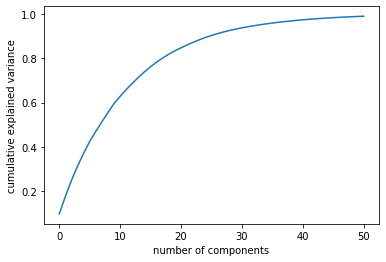

In [203]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(.99, svd_solver ='full') #99
#pca = PCA(.95, svd_solver ='full') #95
#pca = PCA(.90, svd_solver ='full') #90

pca.fit(x_scaled)
ncomponents = len(pca.components_)
print("Cantidad de componentes principales: " + str(ncomponents))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [204]:
x_pca = pca.transform(x_scaled)
principalComponents = pd.DataFrame(data=x_pca, columns=[str(i) for i in range(1, ncomponents+1)] )
principalComponents.tail(5)

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
81,3.855853,-3.391244,-4.713304,-1.332690,6.952826,2.374866,-4.808444,1.729599,-0.028568,-1.504282,...,0.176125,-0.108206,0.253952,0.737105,0.516636,0.071935,1.000311,-0.023063,-0.199414,0.165725
82,2.985067,-1.481813,-4.090513,-0.700914,6.727893,3.859329,-4.242335,1.539148,-1.938745,-0.552203,...,0.617151,-0.512481,-0.602065,-0.555680,0.065578,0.178379,-0.754635,0.649924,0.295846,-0.118724
83,-4.695855,-0.964610,-2.151845,-2.898767,3.403239,-4.150336,-1.829148,-2.255537,-0.384219,1.036859,...,-0.376587,-0.540913,-0.041558,0.175110,-0.305080,0.223106,-0.505514,1.005414,-0.154155,-0.429530
84,-4.965034,-1.095409,-2.182566,-3.971733,3.720411,-2.971209,-2.613664,-1.248816,-0.338669,1.120415,...,-0.437368,-0.157256,-0.369601,-0.116712,0.431601,-0.521571,0.137548,-0.601149,0.589525,-0.377736
85,-4.874840,-0.817356,-0.756289,-3.900285,3.658141,-2.992822,-3.366057,-1.709706,-0.492723,0.276243,...,0.160313,0.566837,0.645000,-0.375549,-0.179991,1.057232,0.406989,0.281891,-0.087689,0.183743


In [205]:
final_df = pd.concat([principalComponents, y], axis=1)
print("Dataset final")
final_df.tail(5)

Dataset final


,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,path
81,3.855853,-3.391244,-4.713304,-1.332690,6.952826,2.374866,-4.808444,1.729599,-0.028568,-1.504282,...,-0.108206,0.253952,0.737105,0.516636,0.071935,1.000311,-0.023063,-0.199414,0.165725,./DataSet/90/S8_2.jpg
82,2.985067,-1.481813,-4.090513,-0.700914,6.727893,3.859329,-4.242335,1.539148,-1.938745,-0.552203,...,-0.512481,-0.602065,-0.555680,0.065578,0.178379,-0.754635,0.649924,0.295846,-0.118724,./DataSet/90/S8_8.jpg
83,-4.695855,-0.964610,-2.151845,-2.898767,3.403239,-4.150336,-1.829148,-2.255537,-0.384219,1.036859,...,-0.540913,-0.041558,0.175110,-0.305080,0.223106,-0.505514,1.005414,-0.154155,-0.429530,./DataSet/90/S9_2.jpg
84,-4.965034,-1.095409,-2.182566,-3.971733,3.720411,-2.971209,-2.613664,-1.248816,-0.338669,1.120415,...,-0.157256,-0.369601,-0.116712,0.431601,-0.521571,0.137548,-0.601149,0.589525,-0.377736,./DataSet/90/S9_6.jpg
85,-4.874840,-0.817356,-0.756289,-3.900285,3.658141,-2.992822,-3.366057,-1.709706,-0.492723,0.276243,...,0.566837,0.645000,-0.375549,-0.179991,1.057232,0.406989,0.281891,-0.087689,0.183743,./DataSet/90/S9_8.jpg


In [206]:
import pickle

bin_folder = "./bin/"
data_folder = "./data/"

datasetv2_path = data_folder + "dataset_PCA_99_90.csv"#Cambia
scaler_path = bin_folder + "scaler_PCA_99_90.dat"
pca_path = bin_folder + "pca_PCA_99_90.dat"
ncomponents_path = bin_folder + "ncomponents_PCA_99_90.dat"

final_df.to_csv(datasetv2_path, index=False)
pickle.dump(scaler, open(scaler_path, "wb"))
pickle.dump(pca, open(pca_path, "wb"))
pickle.dump(ncomponents, open(ncomponents_path, "wb"))